
# Detailed Preprocessing for Diabetes Prediction Dataset

This notebook demonstrates detailed preprocessing steps for the Diabetes Prediction Dataset, including:
- Mapping categorical variables (`gender`, `smoking_history`) to numerical values.
- Detecting outliers using the Z-score method.
- Applying log transformation to reduce skewness and stabilize variance.



## Step 1: Import Libraries

We begin by importing the necessary libraries for data manipulation, visualization, and preprocessing.


In [2]:

import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")



## Step 2: Load and Understand the Data

We load the dataset and explore its structure, including the first few rows.


In [3]:

# Load the dataset
file_path = 'diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0



## Step 3: Data Exploration and Visualization

We'll visualize the distribution of numerical features, the distribution of categorical features, and the correlation between features. This helps us understand the data and guide our preprocessing decisions.


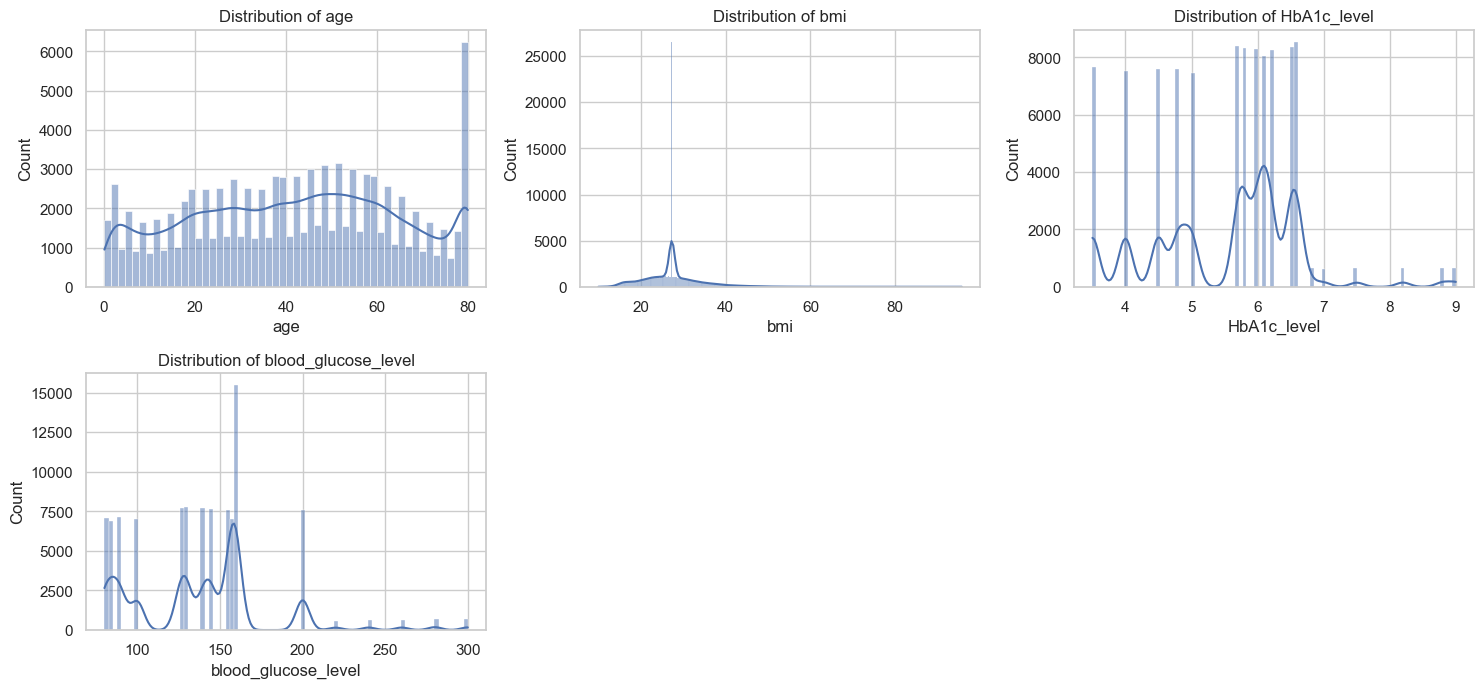

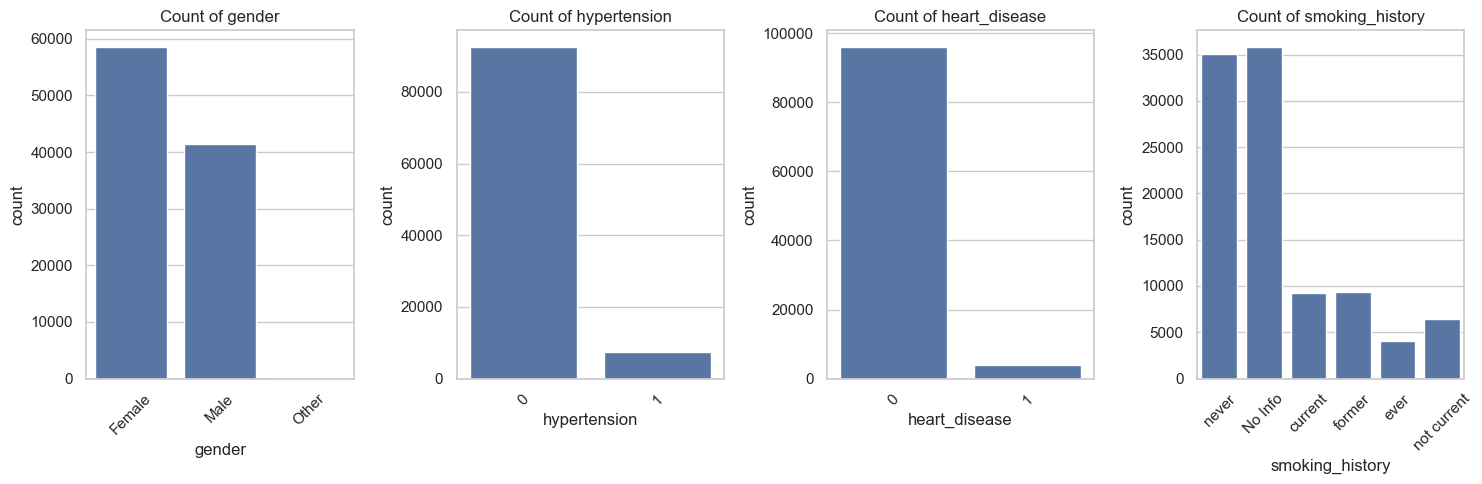

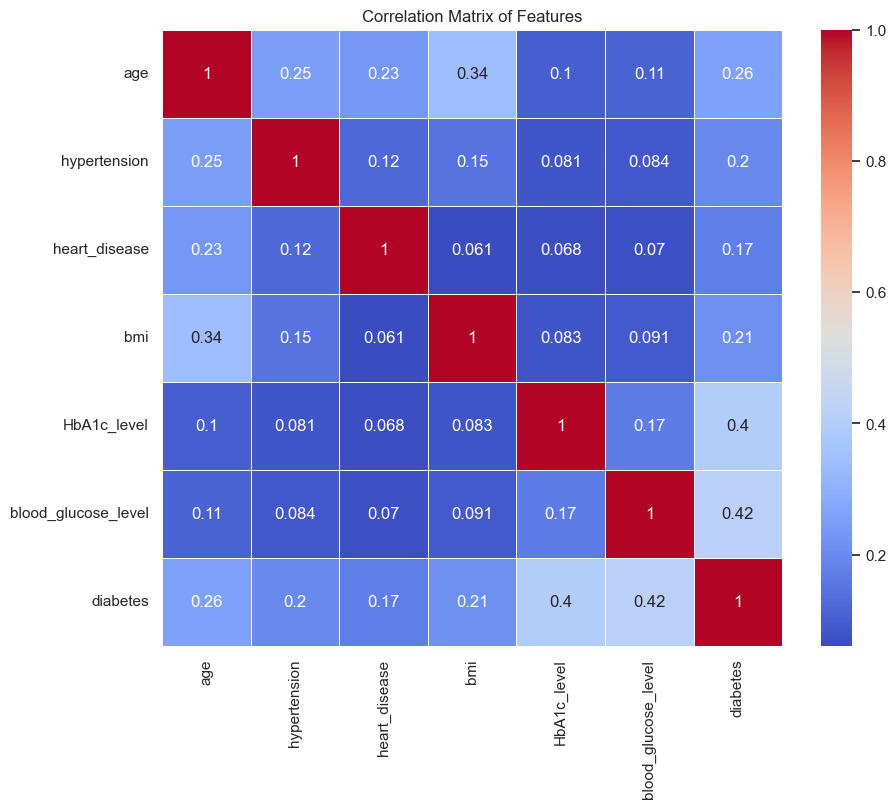

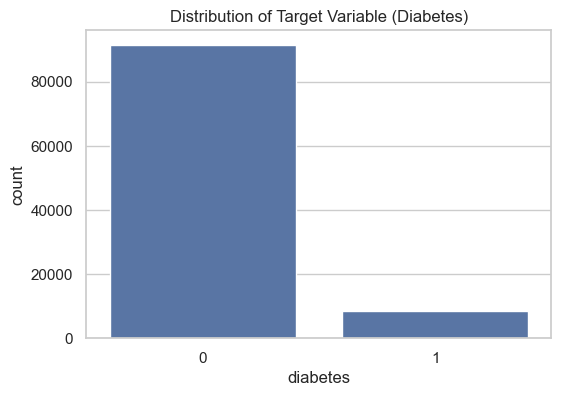

Missing values in each column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [4]:
# Function to visualize distributions of numerical features
def plot_numerical_distributions(data, features):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(3, 3, i + 1)
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Function to visualize categorical features
def plot_categorical_distributions(data, features):
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(features):
        plt.subplot(1, len(features), i + 1)
        sns.countplot(data=data, x=feature)
        plt.title(f'Count of {feature}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize the distribution of numerical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plot_numerical_distributions(data, numerical_features)

# Visualize the distribution of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
plot_categorical_distributions(data, categorical_features)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Visualize the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='diabetes')
plt.title('Distribution of Target Variable (Diabetes)')
plt.show()

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


## Step 4: Map Gender and Smoking History

Convert the `gender` and `smoking_history` columns into numerical values for easier processing.


In [3]:

# Step 1: Map gender and smoking history to numerical values
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['smoking_history'] = data['smoking_history'].map({
    'never': 0,
    'former': 1,
    'current': 2,
    'ever': 3,
    'not current': 4,
    'No Info': 5
})

data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,0,25.19,6.6,140,0
1,1.0,54.0,0,0,5,27.32,6.6,80,0
2,0.0,28.0,0,0,0,27.32,5.7,158,0
3,1.0,36.0,0,0,2,23.45,5.0,155,0
4,0.0,76.0,1,1,2,20.14,4.8,155,0



## Step 5: Detect Outliers Using Z-Score

Use the Z-score method to identify outliers in the numerical columns.


In [20]:

# Step 2: Detecting Outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        z_scores = stats.zscore(data[col])
        outliers[col] = np.where(np.abs(z_scores) > threshold)[0]
    return outliers

outliers = detect_outliers_zscore(data)
print(outliers)

{'gender': array([], dtype=int64), 'age': array([], dtype=int64), 'hypertension': array([    4,    28,    38, ..., 99962, 99963, 99984]), 'heart_disease': array([    0,     4,    23, ..., 99912, 99935, 99938]), 'smoking_history': array([], dtype=int64), 'bmi': array([   11,    39,    59, ..., 99844, 99853, 99953]), 'HbA1c_level': array([   40,    55,    59, ..., 99706, 99740, 99929]), 'blood_glucose_level': array([   94,   104,   125, ..., 99867, 99938, 99957]), 'diabetes': array([    6,    26,    38, ..., 99957, 99962, 99979])}



## Step 6: Apply Log Transformation

Log transformation helps to reduce skewness and stabilize the variance of the data, making it more suitable for modeling.

In [21]:

# Apply Log Transformation with New Columns
def apply_log_transformation(data, cols):
    data_transformed = data.copy()
    for col in cols:
        new_col_name = f'log_{col}'
        data_transformed[new_col_name] = np.log1p(data_transformed[col])  # log1p to handle zero values
    return data_transformed

# Apply log transformation to numerical columns and add new columns
data_transformed = apply_log_transformation(data, numerical_cols)

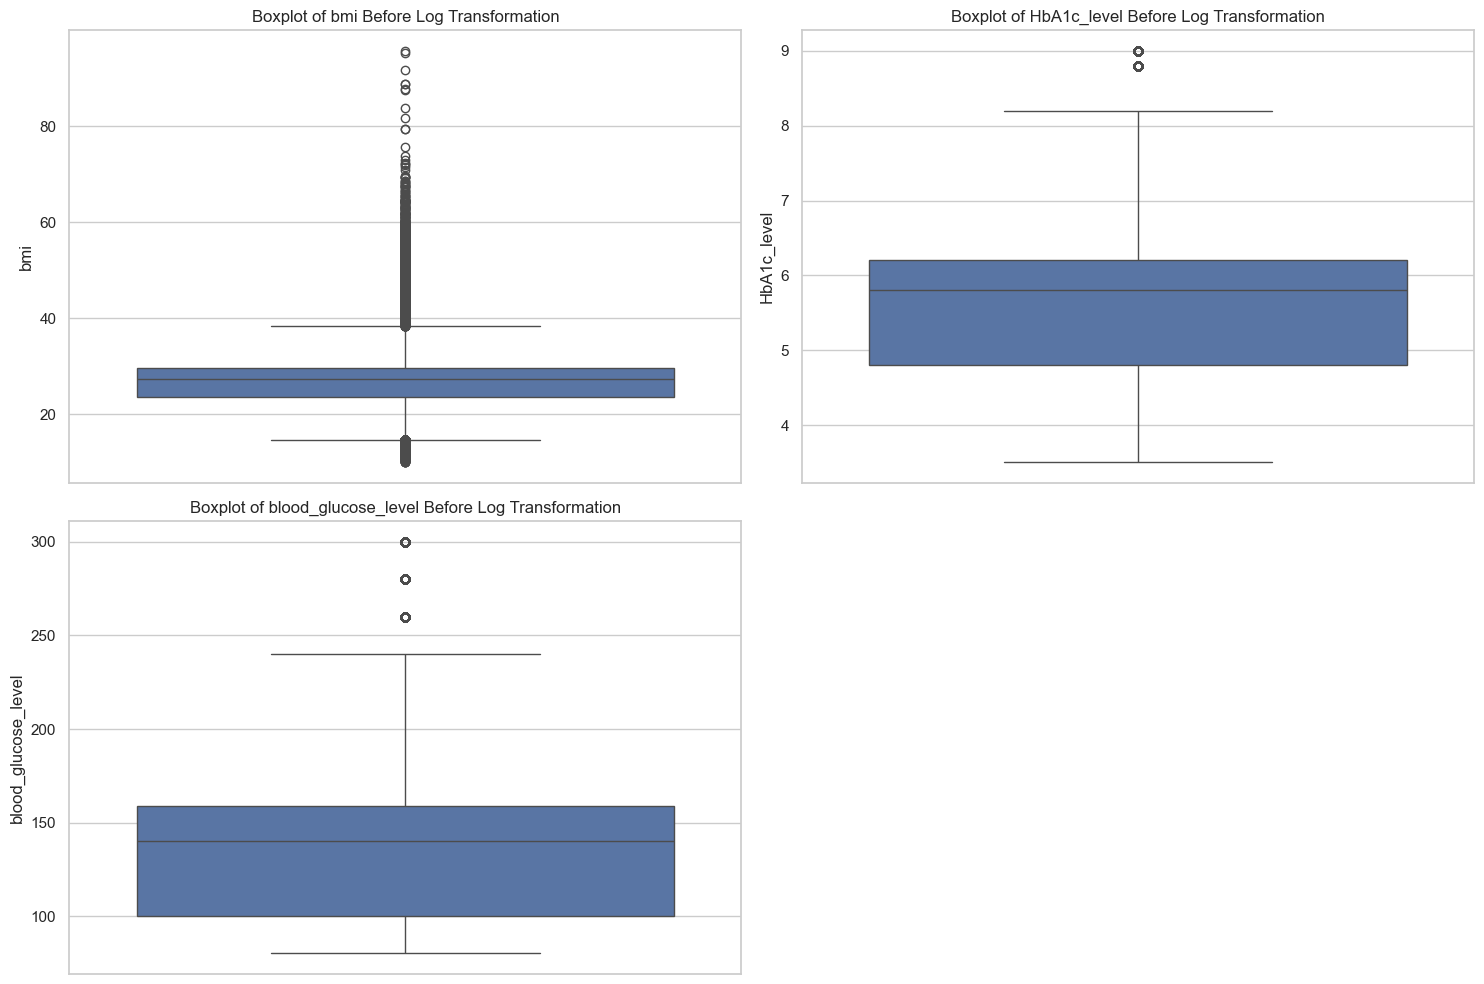

In [17]:

# Step 3: Visualize Before Log Transformation
numerical_cols = ['bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col} Before Log Transformation')
plt.tight_layout()
plt.show()


## Step 5: Visualization of Outliers After Log Transformation

We use boxplots to visualize the outliers after applying the log transformation.


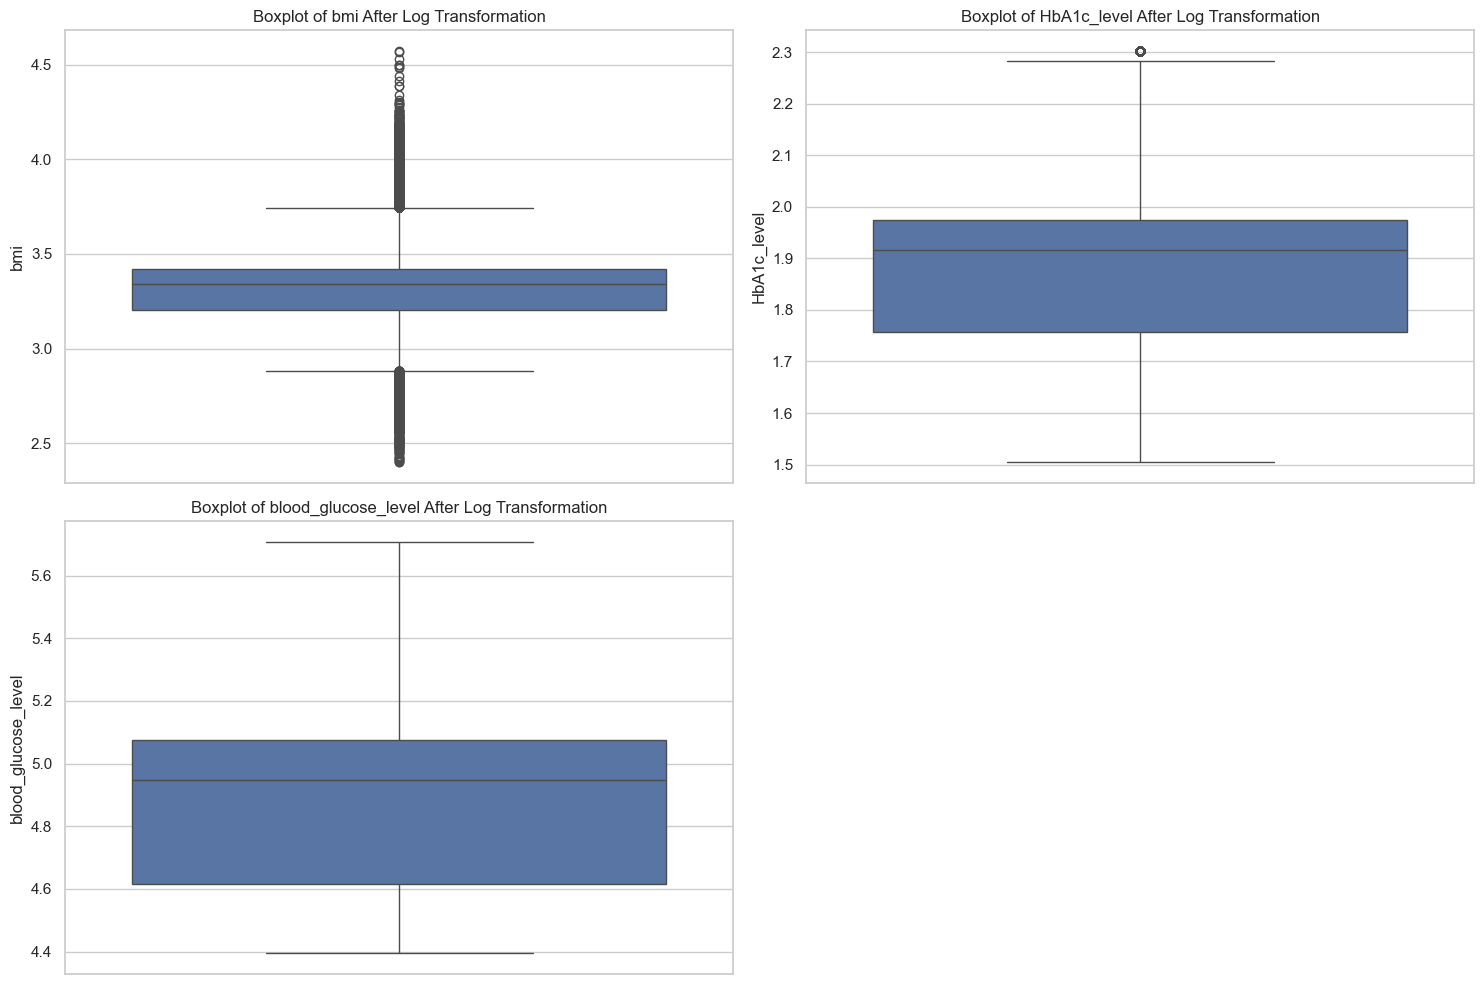

In [8]:

# Step 4: Visualization of Outliers after Log Transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data_transformed, y=col)
    plt.title(f'Boxplot of {col} After Log Transformation')
plt.tight_layout()
plt.show()



## Step 7: Save the preprocessed dataset

We finalize the preprocessing by standardizing the numerical features and splitting the dataset into training and testing sets.


In [23]:
# Add the target variable back to the cleaned dataset if it's not already included
data_transformed['diabetes'] = data['diabetes']

# Save the cleaned dataset to a CSV file
cleaned_dataset_path = 'cleaned_diabetes_dataset.csv'
data_transformed.to_csv(cleaned_dataset_path, index=False)

print(f"Cleaned dataset saved successfully to {cleaned_dataset_path}")

Cleaned dataset saved successfully to cleaned_diabetes_dataset.csv
